In [805]:
#Step (1): Read Data
import pandas as pd #Read data
import numpy as np  #Array

# Read in dataset (encoding = 'Big5'可顯示出繁體中文)
data = pd.read_csv("01train.csv")
data.head() # Show data (看看是否讀取成功)


,手機背蓋溫度(平均),平均APP運作指標/小時,手機電池電量,內容容量比率,Underclocking
0,43.213333,231.000000,61.255411,0.999244,0
1,58.053333,92.090000,91.393846,0.950294,1
2,36.661527,836.239303,68.931202,1.000000,0
3,63.213333,588.800000,54.455267,0.918970,1
4,52.486667,683.900000,61.922799,0.906411,0


In [806]:
#Step (2)-1: Data observations
#統計各個特徵值大小的分布狀況
#此步驟目的為判斷特徵是否有不合理的值、離群值影響的程度(看標準差)、各特徵的量值尺度是否需做scaling...等等
data.describe()

,手機背蓋溫度(平均),平均APP運作指標/小時,手機電池電量,內容容量比率,Underclocking
count,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000
mean,52.784871,656.507337,75.190124,0.833713,0.428132
std,64.786127,717.237752,14.008806,12.506317,0.494871
min,2.562656,-8000.000000,47.889610,-600.000000,0.000000
25%,43.504429,224.700000,62.761544,0.802960,0.000000
50%,53.053333,413.100000,76.677489,0.937191,0.000000
75%,60.650000,834.969651,86.821260,0.987258,1.000000
max,4000.000000,4412.000000,100.000000,500.000000,1.000000


C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.draw()
C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.draw()
C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from current font.
  fig.canvas.draw()
C:\Users\ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 33995 (\N{CJK UNIFIED IDEO

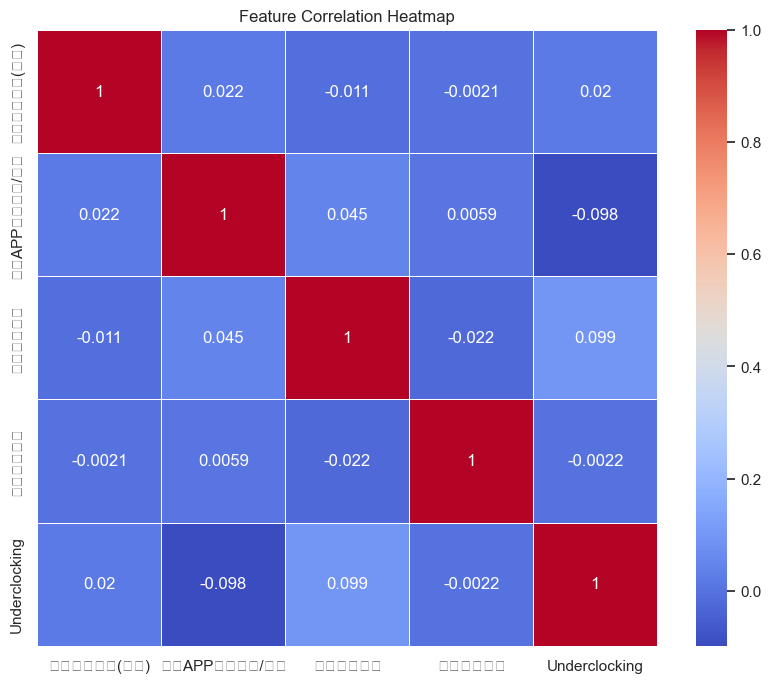

In [807]:
#Step (2)-3:特徵相關性(II) (建議用這個功能，將關聯性做量化)
#關聯性的量值介於-1~1之間，負值表示負相關，正值表示正相關;故絕對量值越大表示特徵之間的關聯性越強
#特徵關聯性的檢查對於"迴歸類"問題相當重要
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5) #各參數代表的意思請查閱seaborn.heatmap官網的說明
plt.title('Feature Correlation Heatmap')
plt.show()

In [808]:
#Step (2)-4:Check data imbalance
class_distribution = data['Underclocking'].value_counts() #指定data中的label欄位，進行各類別數量的統計
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Underclocking
0    2232
1    1671
Name: count, dtype: int64


In [809]:
# Appendix: Data preprocessing (程式供參考用)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #建構standardization的物件

name_list_outlier =['手機背蓋溫度(平均)','平均APP運作指標/小時','手機電池電量','內容容量比率']
name_pre_outlier = ['Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Mobile Phone Battery Level','Content Capacity Ratio']


#離群值處理
def  outlier_del(data_frame,name_list_outlier):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1
        n = 1.5

        # 定义离群值范围
        lower_bound = Q1 - n * IQR
        upper_bound = Q3 + n * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame

#正規化
def data_normalized(data):
    min_max_scaler = MinMaxScaler()
    data_normalized = min_max_scaler.fit_transform(data)
    return data_normalized


In [810]:
#Step (3): 用X儲存features, Y為labels(Underclocking)
X_all=data.iloc[:,:-1].values #把data中第一個column到最後一個column之前的data存入X_all(特徵)
Y_all=data['Underclocking'].values #指定名稱為"Underclocking"的那個column存入Y_all(label)

print(X_all) #查看一下特徵的data
print(Y_all) #查看一下答案的data

[[4.32133333e+01 2.31000000e+02 6.12554113e+01 9.99244224e-01]
 [5.80533333e+01 9.20900000e+01 9.13938462e+01 9.50293665e-01]
 [3.66615270e+01 8.36239303e+02 6.89312023e+01 1.00000000e+00]
 ...
 [4.16333333e+01 1.17600000e+02 5.30663781e+01 8.89574337e-01]
 [5.79466667e+01 2.65600000e+02 8.01226551e+01 7.29295941e-01]
 [5.41866667e+01 2.70600000e+03 8.57323232e+01 9.20181727e-01]]
[0 1 0 ... 0 0 0]


In [811]:
#Step (4): 把dataset分成訓練跟驗證
from sklearn.model_selection import train_test_split
#test_size=0.3 為比例-> training:test=7:3
trainX, testX, trainY, testY = train_test_split(X_all, Y_all, test_size=0.3, random_state=42)

In [812]:
#Step (5):Training
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score #分數驗證的函式庫

#決策樹模型
DecisionTree_Model = DecisionTreeClassifier(criterion='gini',max_depth=4) #max_depth=None 樹沒有深度的限制
DecisionTree_Model.fit(trainX, trainY)

#Show training score
y_pred_train=DecisionTree_Model.predict(trainX) #用training data做預測算出來的分數是"訓練分數";用test data做預測算出來的分數才是"測試分數"
print("Decision Tree Training Score (訓練分數)=", format(accuracy_score(trainY, y_pred_train)*100,'.3f'),'%') 

Decision Tree Training Score (訓練分數)= 69.546 %


In [813]:
#Step (6):Test
y_pred=DecisionTree_Model.predict(testX) #預測的結果存成y_pred

#用y_pred跟實際答案testY比較正確率
print("Decision Tree Test Score (測試分數)=", format(accuracy_score(testY, y_pred)*100,'.3f'),'%') 

Decision Tree Test Score (測試分數)= 65.243 %


<BarContainer object of 4 artists>

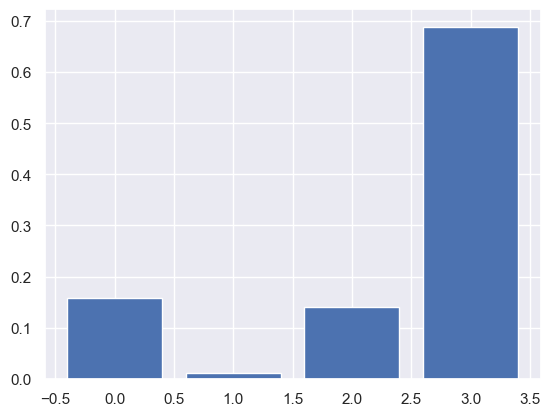

In [814]:
#Other analysis:Feature importance (特徵重要性分析)
import matplotlib.pyplot as plt
plt.bar(range(len(DecisionTree_Model.feature_importances_)), DecisionTree_Model.feature_importances_)

#值越高表示此特徵影響label(Underclocking)越顯著，越低表示此特徵與label之間沒什麼太大關係

In [815]:
# Test 1: Change different models (using default hyperparameters)
# a) Random Forests
# b) Support vector machine (SVM)
# c) Gradient boosting
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#全部模型都使用預設的hyperparameters
RandomForests_Model=RandomForestClassifier()
GradientBoosting_Model=GradientBoostingClassifier()

#Training
RandomForests_Model.fit(trainX, trainY)
GradientBoosting_Model.fit(trainX, trainY)

#Test
y_pred_RF=RandomForests_Model.predict(testX)
y_pred_GB=GradientBoosting_Model.predict(testX)


# Show training and test scores for 4 models
print("Model\t\t\tTraining score\tTest score")
print("---------------------------------------------------")
print("Decision Tree:\t\t", format(accuracy_score(trainY, y_pred_train)*100,'.3f'),'%',end='') 
print("\t",format(accuracy_score(testY, y_pred)*100,'.3f'),'%')

print("Random Forests:\t\t", format(accuracy_score(trainY, RandomForests_Model.predict(trainX))*100,'.3f'),'%',end='') 
print("\t",format(accuracy_score(testY, y_pred_RF)*100,'.3f'),'%')

print("Gradient Boosting:\t", format(accuracy_score(trainY, GradientBoosting_Model.predict(trainX))*100,'.3f'),'%',end='') 
print("\t",format(accuracy_score(testY, y_pred_GB)*100,'.3f'),'%')



Model			Training score	Test score
---------------------------------------------------
Decision Tree:		 69.546 %	 65.243 %
Random Forests:		 100.000 %	 69.855 %
Gradient Boosting:	 76.647 %	 67.891 %


In [816]:
# Test 2: Change Hyperparameters (exercise for students)
DecisionTree_Model = DecisionTreeClassifier(criterion='gini',max_depth=4) #預設的max_depth=None:沒有深度的限制，很容易overfitting
DecisionTree_Model.fit(trainX, trainY) #training 
y_pred=DecisionTree_Model.predict(testX) #test

RandomForests_Model=RandomForestClassifier(n_estimators=1000 ,random_state=42 ,max_depth=4, class_weight= {0:1, 1:1, 2:1, 3:10})
RandomForests_Model.fit(trainX, trainY) #training 
y_pred_RF=RandomForests_Model.predict(testX) #test


# Show training and test scores for 4 models
print("Model\t\t\tTraining score\tTest score")
print("---------------------------------------------------")
print("Decision Tree:\t\t", format(accuracy_score(trainY, DecisionTree_Model.predict(trainX))*100,'.3f'),'%',end='') 
print("\t",format(accuracy_score(testY, y_pred)*100,'.3f'),'%')

print("Random Forests:\t\t", format(accuracy_score(trainY, RandomForests_Model.predict(trainX))*100,'.3f'),'%',end='') 
print("\t",format(accuracy_score(testY, y_pred_RF)*100,'.3f'),'%')


#print("Gradient Boosting:\t", format(accuracy_score(trainY, GradientBoosting_Model.predict(trainX))*100,'.3f'),'%',end='') 
#print("\t",format(accuracy_score(testY, y_pred_GB)*100,'.3f'),'%')



Model			Training score	Test score
---------------------------------------------------
Decision Tree:		 69.546 %	 65.243 %
Random Forests:		 71.157 %	 67.805 %


In [817]:
predicted_ans=RandomForests_Model.predict(testX)
my_submission=pd.DataFrame({'id':test.id,'Underclocking':predicted_ans})
my_submission.to_csv('submission.csv',index=False)

NameError: name 'test' is not defined

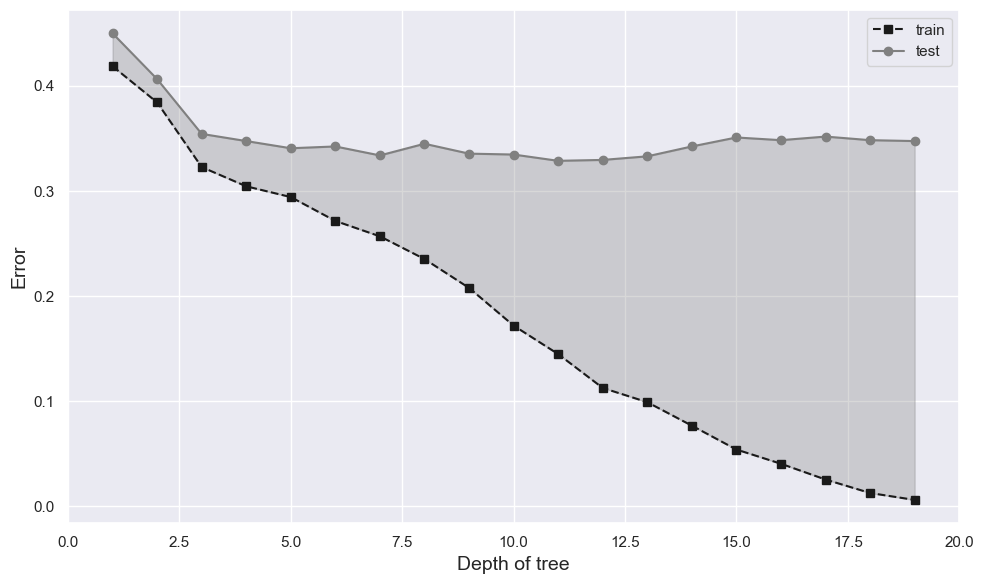

In [ ]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set() 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
trainX, testX, trainY, testY = train_test_split(X_all, Y_all, test_size=0.3, random_state=42)
otrn = [] 
otst = [] 
tree_depth = 20 
for depth in range(1, tree_depth): 
    tree = DecisionTreeClassifier(max_depth=depth) 
    tree.fit(trainX, trainY) 
    otrn.append(1-tree.score(trainX, trainY)) 
    otst.append(1-tree.score(testX, testY)) 
    
divisors = range(1, tree_depth) 
fig,ax=plt.subplots() 
fig.set_size_inches((10,6)) 
_=ax.plot(divisors,otrn,'--s',label='train',color='k') 
_=ax.plot(divisors,otst,'-o',label='test',color='gray') 
_=ax.fill_between(divisors,otrn,otst,color='gray',alpha=.3) 
_=ax.legend(loc=0) 
_=ax.set_xlabel('Depth of tree',fontsize=14) 
_=ax.set_ylabel('Error',fontsize=14) 
_=ax.axis(xmin=0,xmax=20) 
fig.tight_layout()